In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
# digits.data gives acces to the features that can be used to classify digits samples
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
# digits.target gives the ground truth for the digit dataset 
# that is the number corresponding to each digit image that we are trying to learn
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# the data is always a 2D array shape (n_samples, n_features)
# each original sample is an image of shape and can be accessed using digits.images
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
# learning and predicting 
# in the case of the digits dataset, the task is to predict, given an image, which digit it represents.
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C = 100)

In [8]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [9]:
clf.predict(digits.data[-1:])

array([8])

Automatically created module for IPython interactive environment


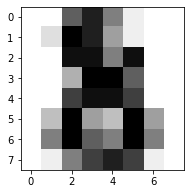

In [12]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets
import matplotlib.pyplot as plt

# load the digits dataset
digits = datasets.load_digits()

# display the first digit
plt.figure(1, figsize = (3, 3))
plt.imshow(digits.images[-1], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [15]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y = True)
clf.fit(X, y)

SVC()

In [16]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [17]:
y[0]

0

In [18]:
from joblib import dump, load
dump(clf, 'filename.joblib')

['filename.joblib']

In [19]:
clf = load('filename.joblib')

In [21]:
# type casting


import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype = 'float32')
X.dtype

dtype('float32')

In [22]:
# in this example below, X is float32 which is cast to float64 by fit_transform(X)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [23]:
# regression targets are cast to float64 and classification targets are maintained
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC()

In [24]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [25]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [26]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [27]:
# refitting and updating parameters
# calling fit() more than once will overwrite what was learned by any previous fit()

import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y = True)

clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)

SVC(kernel='linear')

In [28]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [29]:
clf.set_params(kernel = 'rbf').fit(X, y)

SVC()

In [30]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [31]:
# multi-class v. multilabel fitting
# when using multiclass classifiers, the learning and prediction task that is performed is dependent on the format of the target data fit upon:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0 , 1, 1, 2]

classif = OneVsRestClassifier(estimator = SVC(random_state = 0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [32]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [33]:
# with multilabel outputs, it is similarly possible for an instance to be assigned multiple labels
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])